In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

In [2]:
# additional packages
from statsmodels.stats.diagnostic import lillifors

In [4]:
# Set the parameters
numData = 1000
myMean = 0
mySD = 3

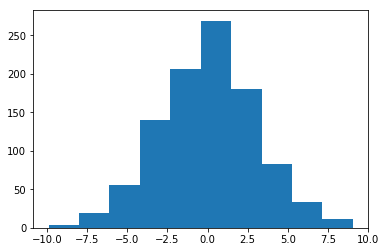

In [5]:
# Generate and show random data
data = stats.norm.rvs(myMean, mySD, size=numData)
fewData = data[:100]
plt.hist(data)
plt.show()

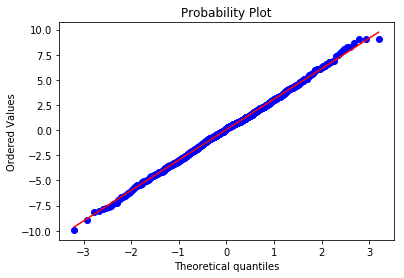

In [8]:
 # --- >>> START stats <<< ---
# Graphical test: if the data lie on a line, they are pretty much
# normally distributed
stats.probplot(data, plot=plt)
plt.show()

In [7]:
pVals = pd.Series()
pFewVals = pd.Series()
# The scipy normaltest is based on D-Agostino and Pearsons test that
# combines skew and kurtosis to produce an omnibus test of normality.
_, pVals['Omnibus']    = stats.normaltest(data)
_, pFewVals['Omnibus'] = stats.normaltest(fewData)

# Shapiro-Wilk test
_, pVals['Shapiro-Wilk']    = stats.shapiro(data)
_, pFewVals['Shapiro-Wilk'] = stats.shapiro(fewData)

# Or you can check for normality with Lilliefors-test
_, pVals['Lilliefors']    = lillifors(data)
_, pFewVals['Lilliefors'] = lillifors(fewData)

# Alternatively with original Kolmogorov-Smirnov test
_, pVals['Kolmogorov-Smirnov']    = stats.kstest((data-np.mean(data))/np.std(data,ddof=1), 'norm')
_, pFewVals['Kolmogorov-Smirnov'] = stats.kstest((fewData-np.mean(fewData))/np.std(fewData,ddof=1), 'norm')

print('p-values for all {0} data points: ----------------'.format(len(data)))
print(pVals)
print('p-values for the first 100 data points: ----------------')
print(pFewVals)

if pVals['Omnibus'] > 0.05:
    print('Data are normally distributed')
# --- >>> STOP stats <<< ---

p-values for all 1000 data points: ----------------
Omnibus               0.856407
Shapiro-Wilk          0.788625
Lilliefors            0.195048
Kolmogorov-Smirnov    0.631536
dtype: float64
p-values for the first 100 data points: ----------------
Omnibus               0.494878
Shapiro-Wilk          0.647018
Lilliefors            0.048368
Kolmogorov-Smirnov    0.384683
dtype: float64
Data are normally distributed
